In [2]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import gridspec
import scipy
style.use('ggplot')
import datetime
#from StringIO import StringIO
from pymining import seqmining 
import re
import numpy as np
from datetime import datetime
sns.set_style('whitegrid')
sns.set_palette('colorblind')
FIG_SIZE = (8.5, 6)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = True

ImportError: No module named 'pymining'

In [2]:
# enhace data about categories
f=open('../saner2018/nada_data/categories_enhanced.csv','w')
with open('../saner2018/nada_data/categories_of_some.csv') as lines:
    for line in lines:
        line=line.lower()
        package=line.split(';')[0]
        if '.' in package:
            f.write(package.replace('.','-')+';'+line.split(';')[1])
        elif '-' in package:
            f.write(package.replace('-','.')+';'+line.split(';')[1])
        f.write(line)
f.close()

In [58]:
import re
s = "Example .,-;.?!#()!?aa-String"
replaced = re.sub('[,-;.?!#()*_]/', ' ', s)
print (replaced.split())

['Example', '.,-;.?!#()!?aa-String']


In [66]:
black=['npm','org','com','library','module','package','javascript','tool','js','cdn']

import re
f=open('../saner2018/nada_data/document_desc.txt', 'w')
for row in keywords.iterrows():
    desc=str(row[1][2])
    if(len(desc)==0):
        continue
    desc = re.sub('[,-;.?!#()*_]/', ' ',desc).split()
    ligne=''
    for d in set(desc):
        if len(d)>3 and str(d) not in black and any(char.isdigit() for char in d) == False:
            ligne=ligne+' '+d
    ligne=ligne.lower()
    f.write(ligne+'\n')
f.close()

In [3]:
# concat keywords and npm datas
keywords=pd.read_csv('../saner2018/nada_data/desc_npm.csv', error_bad_lines=False,
                                sep=';', dtype=object, index_col='name')
categories=pd.read_csv('../saner2018/nada_data/categories_enhanced.csv',
                                sep=';', dtype=object, index_col=None)
categories.name = categories.name.str.lower()

categories.set_index('name',inplace=True)
key_cat = pd.concat([keywords, categories], axis=1)
key_cat.dropna(inplace=True)
len(key_cat)


Skipping line 300: expected 4 fields, saw 5
Skipping line 1521: expected 4 fields, saw 5
Skipping line 5873: expected 4 fields, saw 5
Skipping line 11093: expected 4 fields, saw 5
Skipping line 12472: expected 4 fields, saw 5
Skipping line 12654: expected 4 fields, saw 5
Skipping line 19128: expected 4 fields, saw 5
Skipping line 19602: expected 4 fields, saw 5
Skipping line 21494: expected 4 fields, saw 7
Skipping line 24252: expected 4 fields, saw 6
Skipping line 26490: expected 4 fields, saw 5
Skipping line 33861: expected 4 fields, saw 8
Skipping line 37609: expected 4 fields, saw 5
Skipping line 43210: expected 4 fields, saw 6
Skipping line 43303: expected 4 fields, saw 5
Skipping line 43357: expected 4 fields, saw 5
Skipping line 48188: expected 4 fields, saw 6
Skipping line 52375: expected 4 fields, saw 8
Skipping line 52591: expected 4 fields, saw 5
Skipping line 55886: expected 4 fields, saw 5
Skipping line 65109: expected 4 fields, saw 5
Skipping line 67915: expected 4 fields

545

In [ ]:
# write data about keywords and description into test and train files
f=open('../saner2018/nada_data/train400.txt', 'w')
g=open('../saner2018/nada_data/test100.txt', 'w')
c=open('../saner2018/nada_data/valide_categories.txt', 'w')
b=0
for index, row in key_cat.iterrows():
#     if row[2]=='application tools':
#         continue
    desc=row[1]
    desc = desc.replace(',',' ').split(' ')
    ligne=''
    for d in set(desc):
        if len(d)>3 and any(char.isdigit() for char in d) == False:
            ligne=ligne+' '+d
    ligne=ligne.lower()
    c.write("__label__"+row[3].replace(' ','-')+' '+ligne+'\n')
    if b<400:
        f.write("__label__"+row[3].replace(' ','-')+' '+ligne+'\n')
    else:
        g.write("__label__"+row[3].replace(' ','-')+' '+ligne+'\n')
    b=b+1
f.close()
g.close()
c.close()

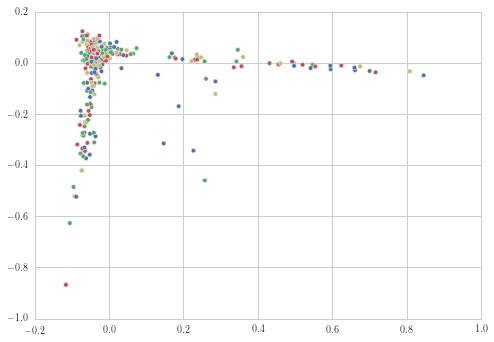

In [4]:
# Just testing kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

documents=[]
with open('../saner2018/nada_data/documents_keywords.txt') as lines:
    for line in lines:
        documents.append(line)


#vectorize the text i.e. convert the strings to numeric features
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(documents).todense()

pca = PCA(n_components=4).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=['r','g','b','y'])
plt.show()              #not required if using ipython notebook

In [15]:
X[0]

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

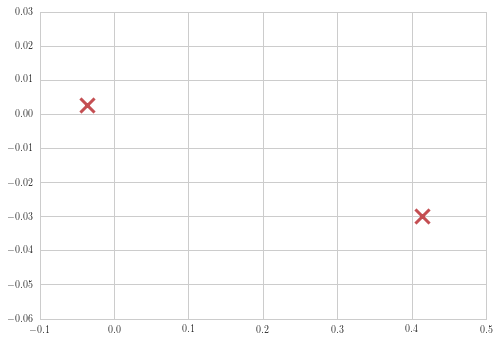

In [5]:
# Just tesint kmeans 2
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.hold(True)
plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r')
plt.show()

In [9]:
kmeans.cluster_centers_

array([[  3.25260652e-19,   3.25260652e-19,   3.25260652e-19, ...,
          3.27617568e-02,   9.58668135e-03,   8.67361738e-19],
       [  7.20138312e-04,   7.20138312e-04,   7.20138312e-04, ...,
         -1.82145965e-17,   1.35121357e-03,   1.09663854e-03]])

In [20]:
f=open('../saner2018/nada_data/table_courds.csv','w')
#f.write('word;value\n')
for word in words:
    if int(words[word])>50:
        #f.write(word+':'+str(words[word])+'\n')
        f.write(str(words[word])+'\t'+word+'\n')
f.close()
    
    

In [50]:
f=open('../saner2018/nada_data/cloud_words_3.txt','w')
with open('../saner2018/nada_data/cloud_words.txt') as lines:
    for line in lines:
        line=line.strip('\n').split(',')
        ligne=''
        for word in set(line):
            if len(word.strip(' '))>3 and 'npm' not in word and 'cdn' not in word and any(char.isdigit() for char in word) == False:
                ligne=ligne+",'"+word+"'"
                f.write(ligne+'\n')
f.close()
# Generate a word cloud image
#wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# # lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")


In [2]:
words={}
with open('../saner2018/nada_data/cloud_words.txt') as lines:
    for line in lines:
        line=line.strip('\n').split(',')
        for word in set(line):
            if len(word.strip(' '))>3 and any(char.isdigit() for char in word) == False:
                try:
                    words[word]=words[word]+1
                except:
                    words[word]=1

In [20]:
from os import path
from wordcloud import WordCloud
import numpy as np
from PIL import Image
alice_mask = np.array(Image.open( "../../NPM.jpg"))
#text = open('../saner2018/nada_data/table_courds.csv').read()
wordcloud = WordCloud( width = 1800, height = 900, background_color='white', mask=alice_mask).generate_from_frequencies(words)

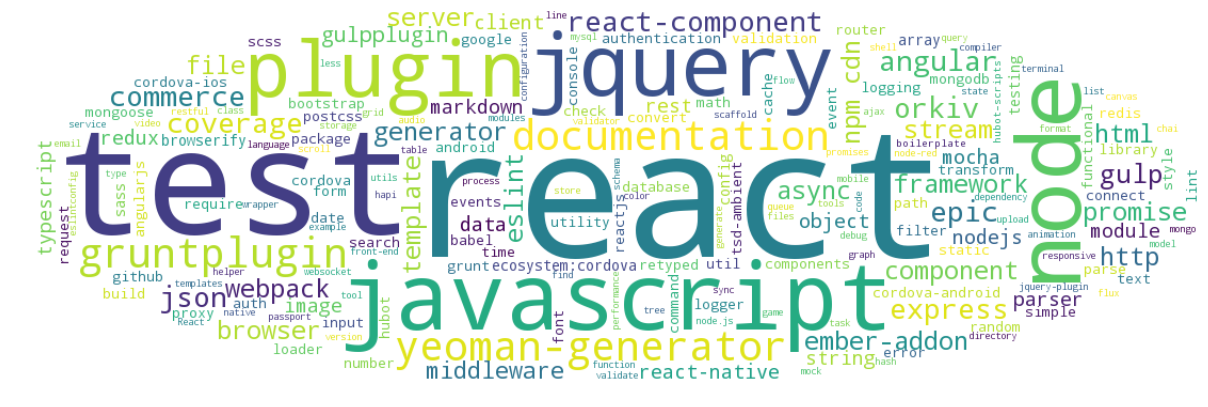

In [21]:
from os import path
from wordcloud import WordCloud
import numpy as np
from PIL import Image
alice_mask = np.array(Image.open( "../../NPM.jpg"))
#text = open('../saner2018/nada_data/table_courds.csv').read()
wordcloud = WordCloud( width = 1800, height = 900, background_color='white', mask=alice_mask).generate_from_frequencies(words)
plt.figure(figsize=(21,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("../../seneca_research/SANER2018/figures/keywords.pdf", bbox_inches='tight', facecolor='white')